In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loaded the Dataset

In [ ]:
df=pd.read_csv('/content/Analytics_loan_collection_dataset.csv')

In [ ]:
categorical_features = ['Location', 'EmploymentStatus', 'LoanType']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
display(df.head())

,CustomerID,Age,Income,LoanAmount,TenureMonths,InterestRate,MissedPayments,DelaysDays,PartialPayments,InteractionAttempts,...,Target,Location_Suburban,Location_Urban,EmploymentStatus_Self-Employed,EmploymentStatus_Student,EmploymentStatus_Unemployed,LoanType_Business,LoanType_Education,LoanType_Home,LoanType_Personal
0,CUST0001,59,1121522,985115,7,13.60,3,151,2,2,...,1,True,False,True,False,False,True,False,False,False
1,CUST0002,49,1784166,717304,34,14.38,2,47,1,2,...,1,False,True,False,True,False,False,True,False,False
2,CUST0003,35,1053938,889319,9,9.61,3,68,1,9,...,1,False,False,False,True,False,False,False,False,True
3,CUST0004,63,1814021,655730,6,9.20,3,169,4,1,...,1,False,True,False,True,False,True,False,False,False
4,CUST0005,28,1827781,99847,24,12.87,2,118,2,0,...,0,True,False,True,False,False,False,False,False,True


In [ ]:
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)
display(df.head())

,CustomerID,Age,Income,LoanAmount,TenureMonths,InterestRate,MissedPayments,DelaysDays,PartialPayments,InteractionAttempts,...,Target,Location_Suburban,Location_Urban,EmploymentStatus_Self-Employed,EmploymentStatus_Student,EmploymentStatus_Unemployed,LoanType_Business,LoanType_Education,LoanType_Home,LoanType_Personal
0,CUST0001,59,1121522,985115,7,13.60,3,151,2,2,...,1,1,0,1,0,0,1,0,0,0
1,CUST0002,49,1784166,717304,34,14.38,2,47,1,2,...,1,0,1,0,1,0,0,1,0,0
2,CUST0003,35,1053938,889319,9,9.61,3,68,1,9,...,1,0,0,0,1,0,0,0,0,1
3,CUST0004,63,1814021,655730,6,9.20,3,169,4,1,...,1,0,1,0,1,0,1,0,0,0
4,CUST0005,28,1827781,99847,24,12.87,2,118,2,0,...,0,1,0,1,0,0,0,0,0,1


# Feature Engineering

In [ ]:
# Debt-to-Income Ratio
df['Debt-to-Income Ratio'] = df['LoanAmount'] / df['Income']

df['Estimated EMI'] = df['LoanAmount'] / df['TenureMonths'] + (df['LoanAmount'] * df['InterestRate'] / 100 / 12)

df['Payment-to-Income Ratio'] = (df['Estimated EMI'] * 12) / df['Income']

df['Delinquency Rate'] = df['MissedPayments'] / df['TenureMonths']

df['Irregular Payment Habits'] = (df['PartialPayments'] > 0).astype(int)

df['Proportion of Delayed Days'] = df['DelaysDays'] / df['TenureMonths']

# Added 1.1 to the denominator to avoid division by zero if SentimentScore is -1
df['Interaction Inefficiency'] = df['InteractionAttempts'] / (df['SentimentScore'] + 1.1)

df['Digital Engagement Score'] = (df['AppUsageFrequency'] * 0.6) + (df['WebsiteVisits'] * 0.4)

df['Problem Indicator'] = (df['Complaints'] > 0).astype(int)

display(df.head())

,CustomerID,Age,Income,LoanAmount,TenureMonths,InterestRate,MissedPayments,DelaysDays,PartialPayments,InteractionAttempts,...,LoanType_Personal,Debt-to-Income Ratio,Estimated EMI,Payment-to-Income Ratio,Delinquency Rate,Irregular Payment Habits,Proportion of Delayed Days,Interaction Inefficiency,Digital Engagement Score,Problem Indicator
0,CUST0001,59,1121522,985115,7,13.60,3,151,2,2,...,0,0.878373,151895.350952,1.625242,0.428571,1,21.571429,5.555556,7.912,0
1,CUST0002,49,1784166,717304,34,14.38,2,47,1,2,...,0,0.402039,29692.869404,0.199709,0.058824,1,1.382353,6.060606,6.056,1
2,CUST0003,35,1053938,889319,9,9.61,3,68,1,9,...,1,0.843806,105935.185214,1.206164,0.333333,1,7.555556,45.000000,12.998,0
3,CUST0004,63,1814021,655730,6,9.20,3,169,4,1,...,0,0.361479,114315.596667,0.756213,0.500000,1,28.166667,0.813008,6.628,0
4,CUST0005,28,1827781,99847,24,12.87,2,118,2,0,...,1,0.054627,5231.150742,0.034344,0.083333,1,4.916667,0.000000,8.158,0


# Checking Outliers

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns

outlier_counts = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

print("Outlier counts for each numerical column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

Outlier counts for each numerical column:
Age: 0
Income: 0
LoanAmount: 0
TenureMonths: 0
InterestRate: 0
MissedPayments: 2
DelaysDays: 0
PartialPayments: 4
InteractionAttempts: 0
SentimentScore: 0
ResponseTimeHours: 0
AppUsageFrequency: 0
WebsiteVisits: 0
Complaints: 20
Target: 0
Location_Suburban: 0
Location_Urban: 0
EmploymentStatus_Self-Employed: 458
EmploymentStatus_Student: 0
EmploymentStatus_Unemployed: 0
LoanType_Business: 400
LoanType_Education: 403
LoanType_Home: 329
LoanType_Personal: 400
Debt-to-Income Ratio: 136
Estimated EMI: 145
Payment-to-Income Ratio: 177
Delinquency Rate: 136
Irregular Payment Habits: 0
Proportion of Delayed Days: 161
Interaction Inefficiency: 210
Digital Engagement Score: 0
Problem Indicator: 0


In [ ]:
df.columns

Index(['CustomerID', 'Age', 'Income', 'LoanAmount', 'TenureMonths',
       'InterestRate', 'MissedPayments', 'DelaysDays', 'PartialPayments',
       'InteractionAttempts', 'SentimentScore', 'ResponseTimeHours',
       'AppUsageFrequency', 'WebsiteVisits', 'Complaints', 'Target',
       'Location_Suburban', 'Location_Urban', 'EmploymentStatus_Self-Employed',
       'EmploymentStatus_Student', 'EmploymentStatus_Unemployed',
       'LoanType_Business', 'LoanType_Education', 'LoanType_Home',
       'LoanType_Personal', 'Debt-to-Income Ratio', 'Estimated EMI',
       'Payment-to-Income Ratio', 'Delinquency Rate',
       'Irregular Payment Habits', 'Proportion of Delayed Days',
       'Interaction Inefficiency', 'Digital Engagement Score',
       'Problem Indicator'],
      dtype='object')

# Normalizing the Dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols_for_scaling = df.select_dtypes(include=np.number).columns.tolist()


scaler = MinMaxScaler()


df_normalized = df.copy()
df_normalized[numeric_cols_for_scaling] = scaler.fit_transform(df_normalized[numeric_cols_for_scaling])

display(df_normalized.head())

,CustomerID,Age,Income,LoanAmount,TenureMonths,InterestRate,MissedPayments,DelaysDays,PartialPayments,InteractionAttempts,...,LoanType_Personal,Debt-to-Income Ratio,Estimated EMI,Payment-to-Income Ratio,Delinquency Rate,Irregular Payment Habits,Proportion of Delayed Days,Interaction Inefficiency,Digital Engagement Score,Problem Indicator
0,CUST0001,0.866667,0.517624,0.968654,0.035714,0.800214,0.375,0.843575,0.333333,0.222222,...,0.0,0.180075,0.870302,0.186994,0.642857,1.0,0.638208,0.074074,0.393607,0.0
1,CUST0002,0.644444,0.877690,0.692340,0.517857,0.883547,0.250,0.262570,0.166667,0.222222,...,0.0,0.078999,0.163756,0.022034,0.088235,1.0,0.040898,0.080808,0.301205,1.0
2,CUST0003,0.333333,0.480900,0.869817,0.071429,0.373932,0.375,0.379888,0.166667,1.000000,...,1.0,0.172740,0.604571,0.138499,0.500000,1.0,0.223537,0.600000,0.646819,0.0
3,CUST0004,0.955556,0.893913,0.628811,0.017857,0.330128,0.375,0.944134,0.666667,0.111111,...,0.0,0.070392,0.653025,0.086432,0.750000,1.0,0.833333,0.010840,0.329682,0.0
4,CUST0005,0.177778,0.901390,0.055278,0.339286,0.722222,0.250,0.659218,0.333333,0.000000,...,1.0,0.005280,0.022325,0.002899,0.125000,1.0,0.145464,0.000000,0.405855,0.0


## Spliting the data


Divided the dataset into training, testing, and validation sets.


In [ ]:
from sklearn.model_selection import train_test_split


X=df_normalized.drop(['Target', 'CustomerID'], axis=1)
y=df['Target']


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)


X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (1200, 32) (1200,)
Testing set shape: (400, 32) (400,)
Validation set shape: (400, 32) (400,)


## Define model and hyperparameter grid


Chose a model and defined the hyperparameter grid for tuning.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200,],
    'max_depth': [None,10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2,],
    'criterion': ['gini', 'entropy']
}

## Perform gridsearchcv with cross-validation


Used GridSearchCV with 5-fold cross-validation on the training data to find the best hyperparameters.


In [ ]:
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


## Train final model


Train the chosen model with the best hyperparameters on the entire training dataset.


In [ ]:

best_rf_model = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    criterion=grid_search.best_params_['criterion'],
    random_state=42 # Ensure reproducibility
)


best_rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, random_state=42)

In [ ]:

df['Risk Score'] = best_rf_model.predict_proba(X)[:, 1]

display(df.head())

,CustomerID,Age,Income,LoanAmount,TenureMonths,InterestRate,MissedPayments,DelaysDays,PartialPayments,InteractionAttempts,...,Debt-to-Income Ratio,Estimated EMI,Payment-to-Income Ratio,Delinquency Rate,Irregular Payment Habits,Proportion of Delayed Days,Interaction Inefficiency,Digital Engagement Score,Problem Indicator,Risk Score
0,CUST0001,59,1121522,985115,7,13.60,3,151,2,2,...,0.878373,151895.350952,1.625242,0.428571,1,21.571429,5.555556,7.912,0,0.878179
1,CUST0002,49,1784166,717304,34,14.38,2,47,1,2,...,0.402039,29692.869404,0.199709,0.058824,1,1.382353,6.060606,6.056,1,0.945250
2,CUST0003,35,1053938,889319,9,9.61,3,68,1,9,...,0.843806,105935.185214,1.206164,0.333333,1,7.555556,45.000000,12.998,0,0.676260
3,CUST0004,63,1814021,655730,6,9.20,3,169,4,1,...,0.361479,114315.596667,0.756213,0.500000,1,28.166667,0.813008,6.628,0,0.885980
4,CUST0005,28,1827781,99847,24,12.87,2,118,2,0,...,0.054627,5231.150742,0.034344,0.083333,1,4.916667,0.000000,8.158,0,0.249607


In [ ]:

df.to_csv('loan_collection_with_risk_score.csv', index=False)

## Evaluate model on Test set

Evaluate the trained model on the test dataset.


In [ ]:
from sklearn.metrics import accuracy_score


y_scores = best_rf_model.predict_proba(X_test)[:, 1]


optimal_threshold = 0.588
y_pred = (y_scores >= optimal_threshold).astype(int)


accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on the test set (threshold={optimal_threshold}): {accuracy:.4f}")

Accuracy on the test set (threshold=0.588): 0.8475


In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(cm)


Precision: 0.9500
Recall: 0.7415
Confusion Matrix:
[[187   8]
 [ 53 152]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(cm)



Precision: 0.9500
Recall: 0.7415
Confusion Matrix:
[[152  53]
 [  8 187]]


# Evaluating on Validation Set

In [ ]:
from sklearn.metrics import accuracy_score


y_scores_val = best_rf_model.predict_proba(X_val)[:, 1]


optimal_threshold = 0.588
y_pred_val = (y_scores_val >= optimal_threshold).astype(int)

accuracy = accuracy_score(y_val, y_pred_val)

print(f"Accuracy on the Validation set (threshold={optimal_threshold}): {accuracy:.4f}")

Accuracy on the Validation set (threshold=0.588): 0.8525


In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
cm = confusion_matrix(y_val, y_pred_val,labels=[1, 0])

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(cm)


Precision: 0.9304
Recall: 0.7538
Confusion Matrix:
[[147  48]
 [ 11 194]]


## Evaluate model with additional metrics


Calculating precision and recall and plot the ROC AUC curve.

Precision on the test set: 0.9500
Recall on the test set: 0.7415


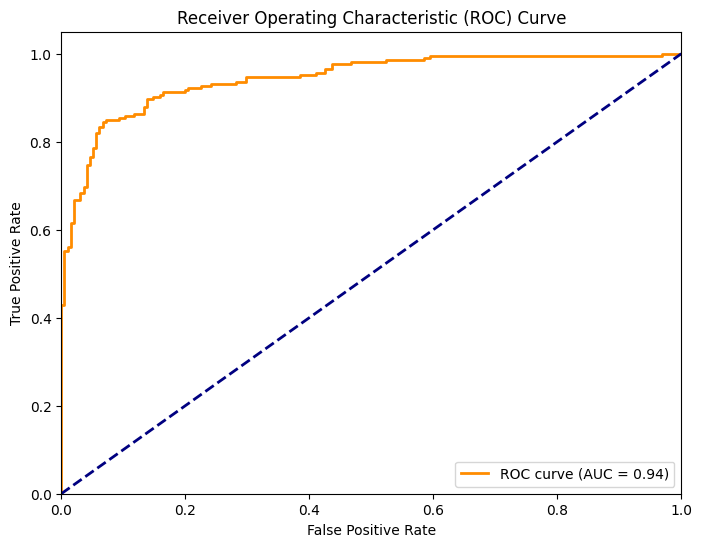

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision on the test set: {precision:.4f}")
print(f"Recall on the test set: {recall:.4f}")

# Calculate the ROC curve and AUC score
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()




# Precison FPR curve plot to decide for threshold

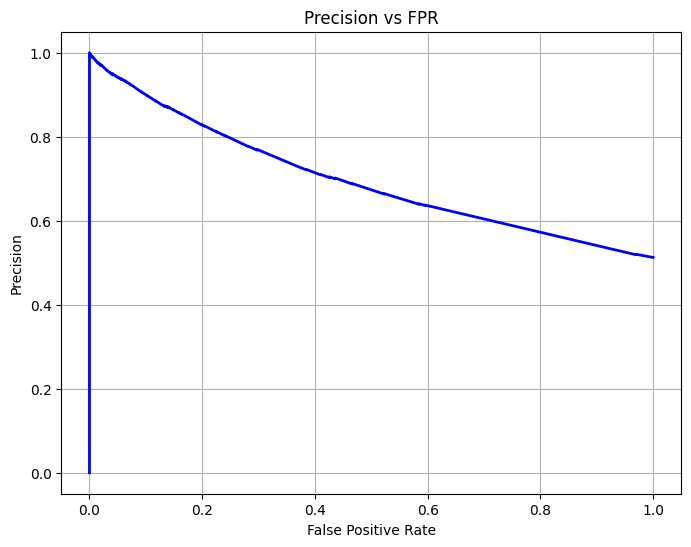

In [ ]:
from sklearn.metrics import precision_score, roc_curve


y_scores =best_rf_model.predict_proba(X_test)[:, 1]

# ROC values
fpr, tpr, roc_thresholds = roc_curve(y_test, y_scores)

# Precision at the same thresholds
precision_at_thresholds = []
for thresh in roc_thresholds:
    preds = (y_scores >= thresh).astype(int)
    precision_at_thresholds.append(precision_score(y_test, preds))


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, precision_at_thresholds, color='blue', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('Precision')
plt.title('Precision vs FPR')
plt.grid(True)
plt.show()


## Train and evaluate xgboost



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


xgb_model = XGBClassifier(random_state=42)


xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate the accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Calculate precision and recall
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)

# Print the evaluation metrics
print(f"XGBoost Accuracy on the test set: {accuracy_xgb:.4f}")
print(f"XGBoost Precision on the test set: {precision_xgb:.4f}")
print(f"XGBoost Recall on the test set: {recall_xgb:.4f}")

XGBoost Accuracy on the test set: 0.8650
XGBoost Precision on the test set: 0.9081
XGBoost Recall on the test set: 0.8195


## Train and evaluate lightgbm



In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


lgbm_model = LGBMClassifier(random_state=42)


lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgbm = lgbm_model.predict(X_test)

# Calculate the accuracy, precision, and recall
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm)
recall_lgbm = recall_score(y_test, y_pred_lgbm)

# Print the evaluation metrics
print(f"LightGBM Accuracy on the test set: {accuracy_lgbm:.4f}")
print(f"LightGBM Precision on the test set: {precision_lgbm:.4f}")
print(f"LightGBM Recall on the test set: {recall_lgbm:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 584, number of negative: 616
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3319
[LightGBM] [Info] Number of data points in the train set: 1200, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486667 -> initscore=-0.053346
[LightGBM] [Info] Start training from score -0.053346
LightGBM Accuracy on the test set: 0.8600
LightGBM Precision on the test set: 0.9116
LightGBM Recall on the test set: 0.8049


## Compare model performance


Comparing the performance of all trained models (Random Forest, XGBoost, LightGBM) using appropriate metrics.


In [ ]:
# Print evaluation metrics for each model
print("Random Forest Performance:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print("-" * 30)

print("XGBoost Performance:")
print(f"  Accuracy: {accuracy_xgb:.4f}")
print(f"  Precision: {precision_xgb:.4f}")
print(f"  Recall: {recall_xgb:.4f}")
print("-" * 30)

print("LightGBM Performance:")
print(f"  Accuracy: {accuracy_lgbm:.4f}")
print(f"  Precision: {precision_lgbm:.4f}")
print(f"  Recall: {recall_lgbm:.4f}")
print("-" * 30)

# Summarize performance
print("Performance Summary:")
if accuracy > accuracy_xgb and accuracy > accuracy_lgbm:
    print("Random Forest has the highest accuracy.")
elif accuracy_xgb > accuracy and accuracy_xgb > accuracy_lgbm:
    print("XGBoost has the highest accuracy.")
else:
    print("LightGBM has the highest accuracy.")

if precision > precision_xgb and precision > precision_lgbm:
    print("Random Forest has the highest precision.")
elif precision_xgb > precision and precision_xgb > precision_lgbm:
    print("XGBoost has the highest precision.")
else:
    print("LightGBM has the highest precision.")

if recall > recall_xgb and recall > recall_lgbm:
    print("Random Forest has the highest recall.")
elif recall_xgb > recall and recall_xgb > recall_lgbm:
    print("XGBoost has the highest recall.")
else:
    print("LightGBM has the highest recall.")

Random Forest Performance:
  Accuracy: 0.8525
  Precision: 0.9500
  Recall: 0.7415
------------------------------
XGBoost Performance:
  Accuracy: 0.8650
  Precision: 0.9081
  Recall: 0.8195
------------------------------
LightGBM Performance:
  Accuracy: 0.8600
  Precision: 0.9116
  Recall: 0.8049
------------------------------
Performance Summary:
XGBoost has the highest accuracy.
Random Forest has the highest precision.
XGBoost has the highest recall.


In [ ]:
!pip install shap

## Calculating shap values




In [ ]:
import shap

# Create a SHAP TreeExplainer object
explainer = shap.TreeExplainer(best_rf_model)

# Calculate SHAP values for the test dataset
shap_values = explainer.shap_values(X_test)

shap_values_positive = shap_values[:, :, 1]

print("SHAP values calculated successfully.")

SHAP values calculated successfully.


In [ ]:
print(shap_values_positive.shape)
print(X_test.shape)


(400, 32)
(400, 32)


## Generating a summary plot


 So that I can understand the overall feature importance and impact.


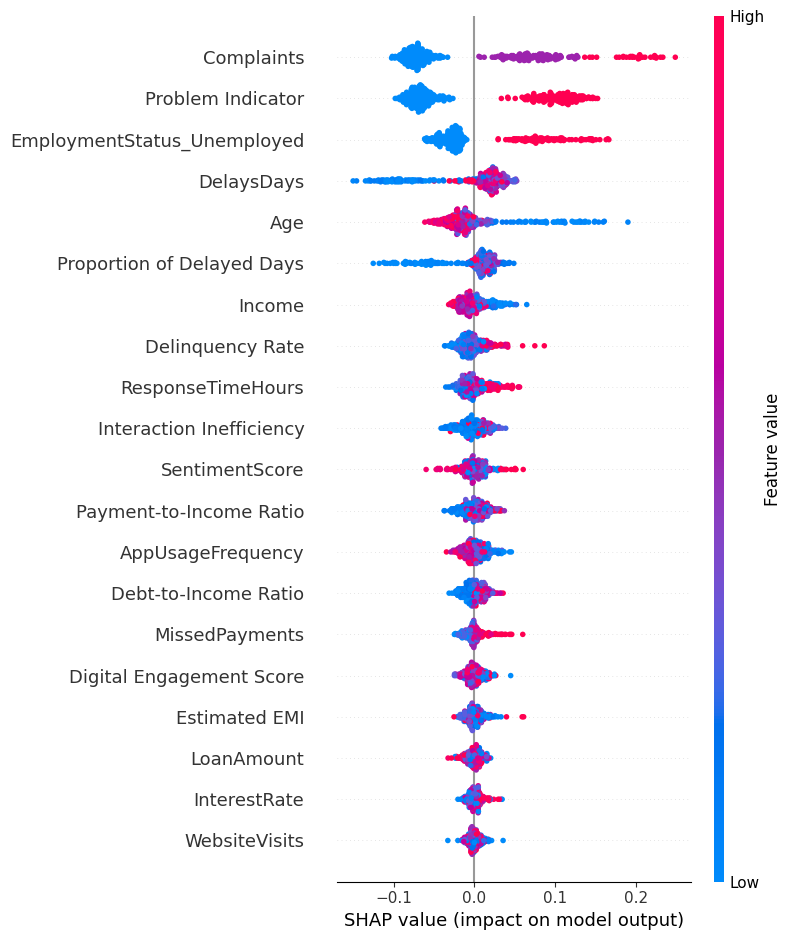

In [ ]:

shap.summary_plot(shap_values_positive, X_test)

- The features are ranked from top to bottom by their overall importance (mean absolute SHAP value).

- Complaints is at the top → it had the largest average impact on predictions.

- WebsiteVisits at the bottom → smallest average impact.

- The further away from 0, the stronger the influence.

- Blue = low feature value

- Pink/red = high feature value

- The wider the spread of points along X for a feature, the more variable its impact across the dataset.





# Generating the Dependency Plot
it shows how the value of a single feature influences the model’s prediction across all samples.

In [ ]:
X_test_used = X_test

In [ ]:
print(shap_values_positive.shape, X_test_used.shape)

(400, 32) (400, 32)


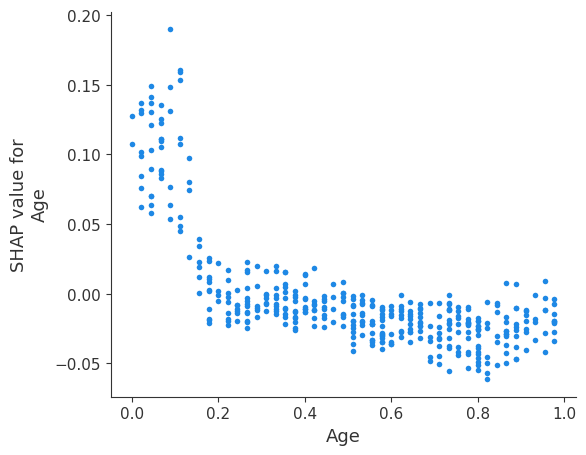

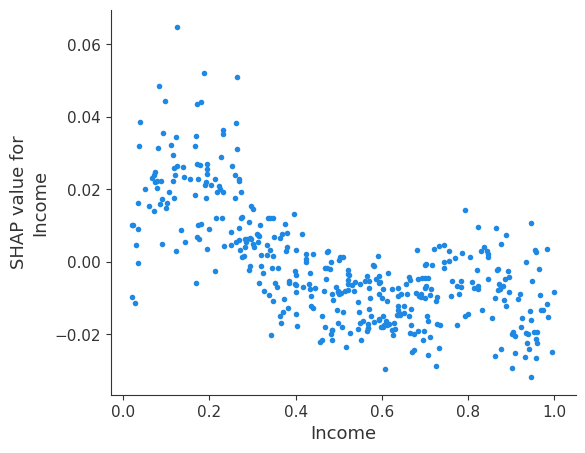

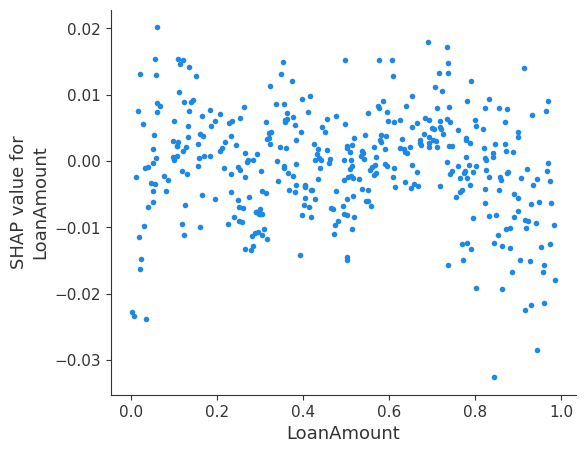

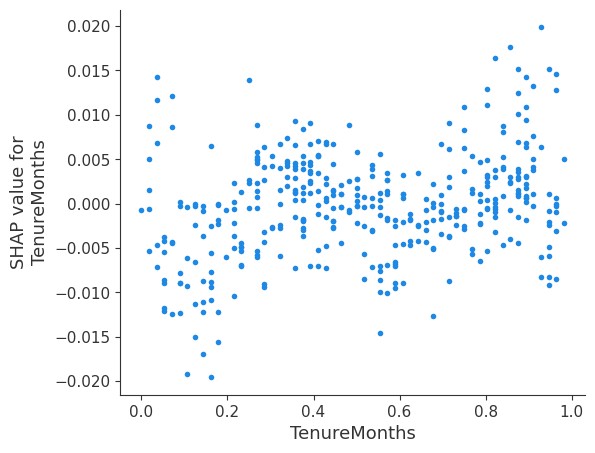

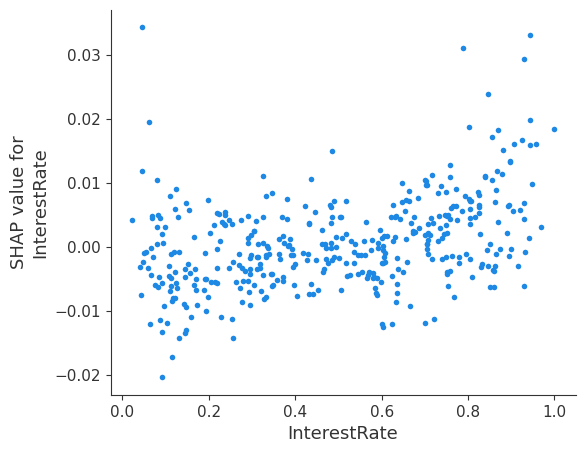

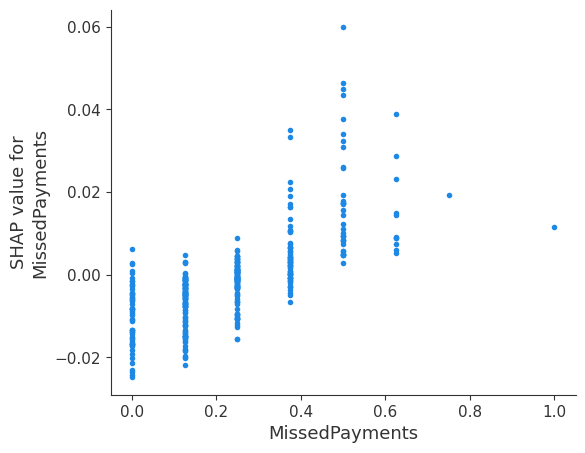

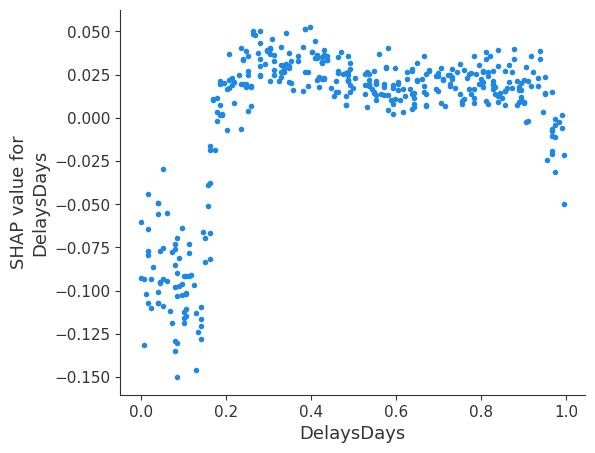

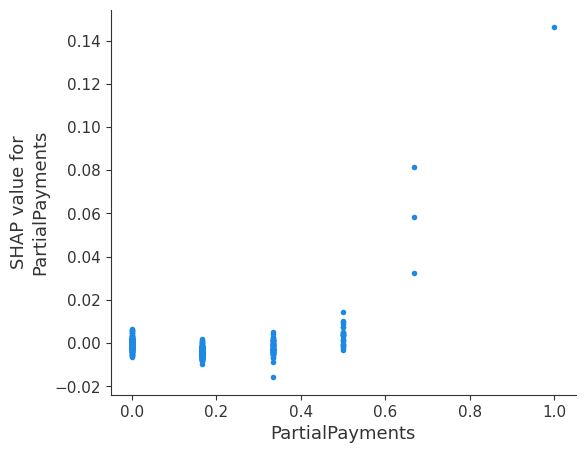

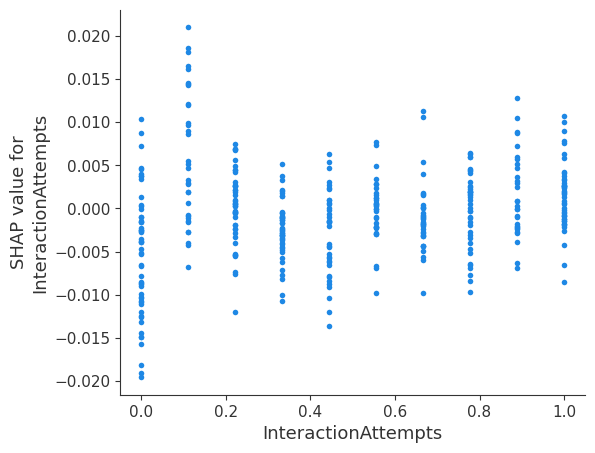

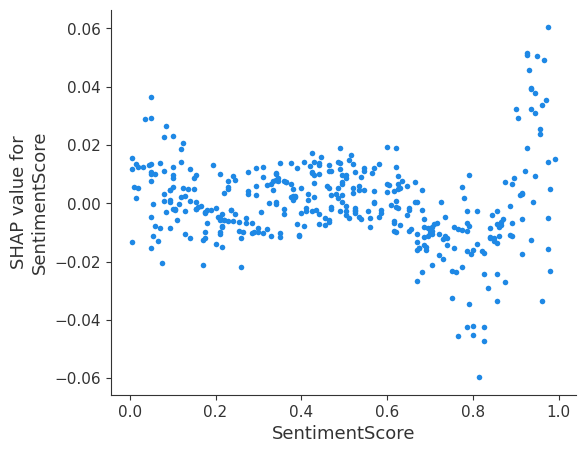

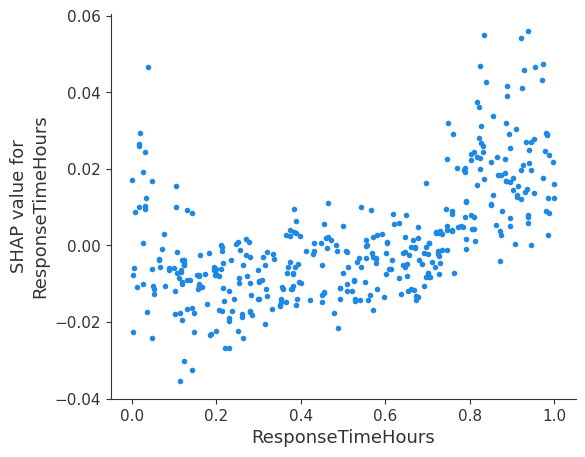

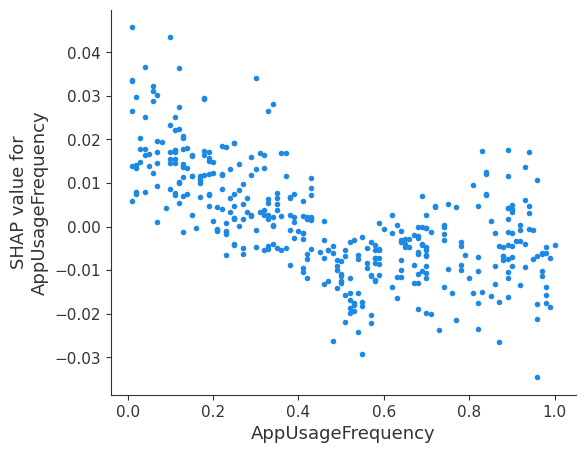

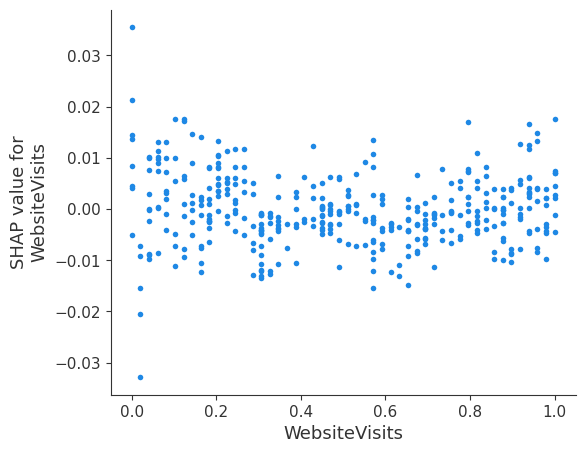

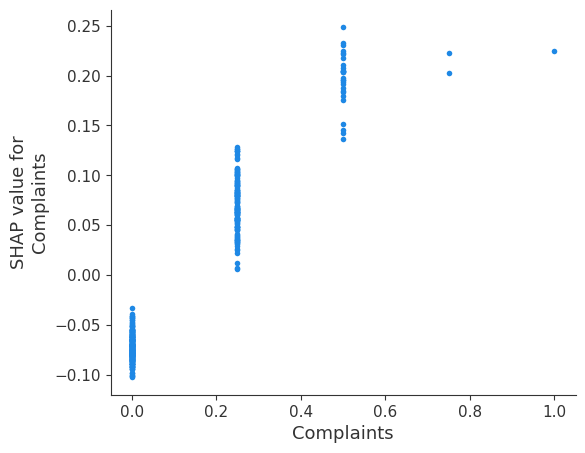

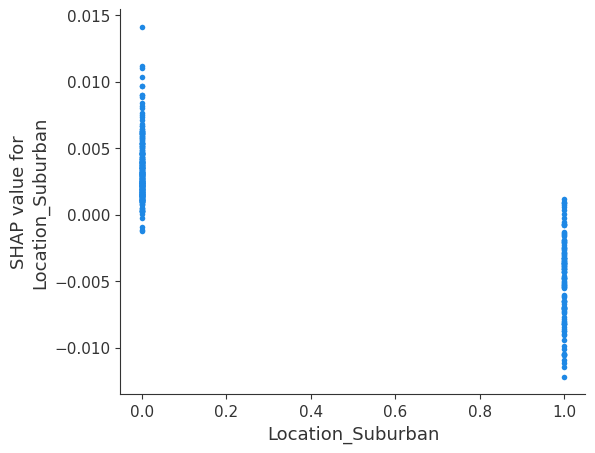

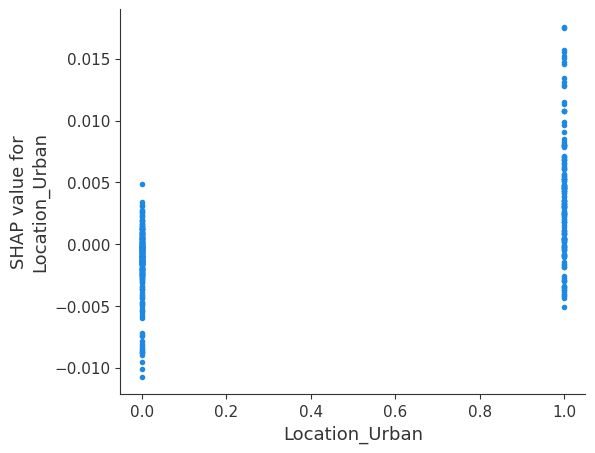

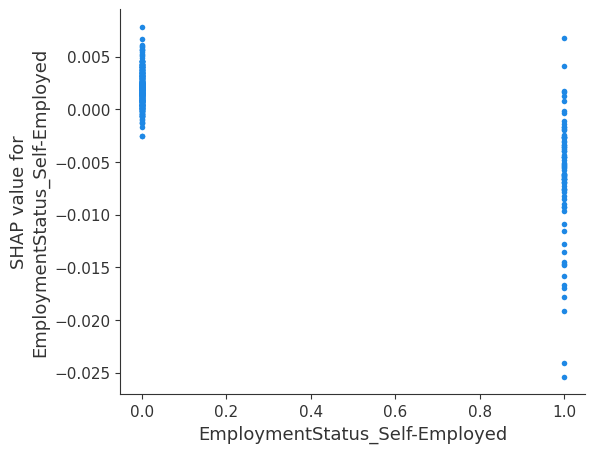

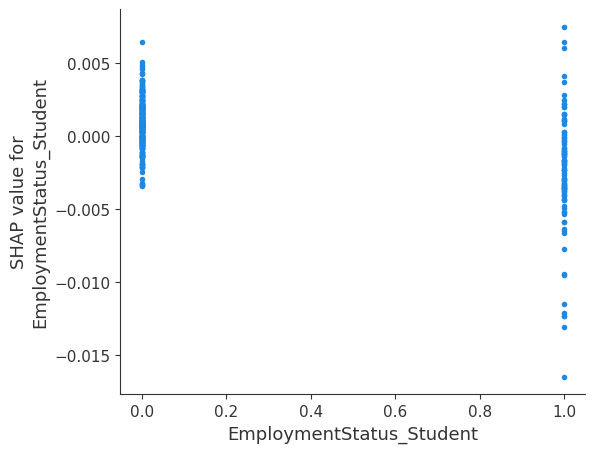

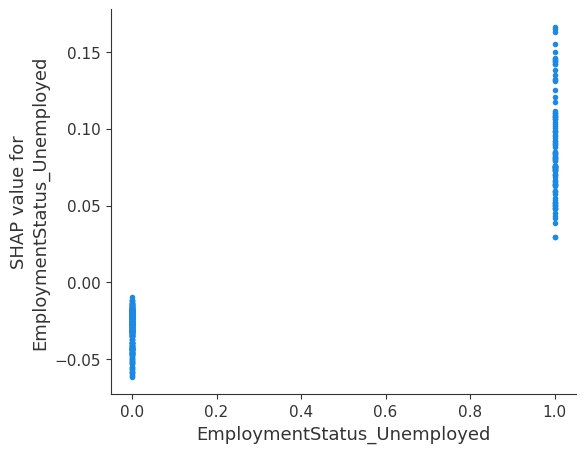

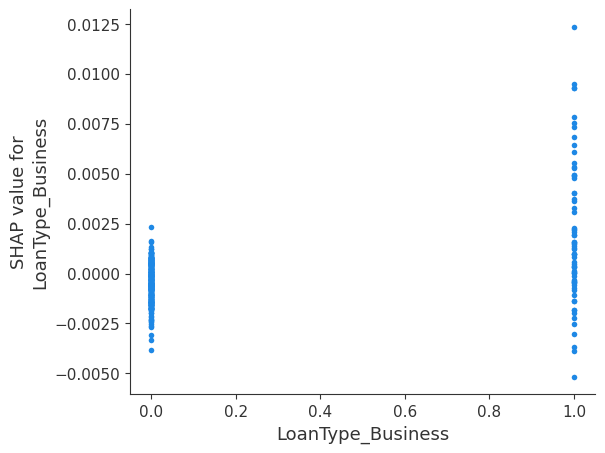

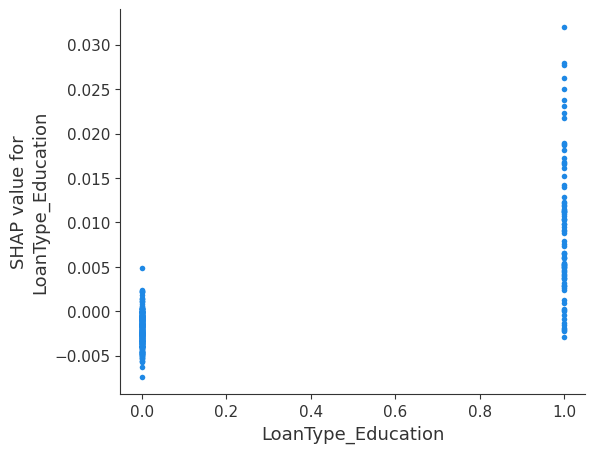

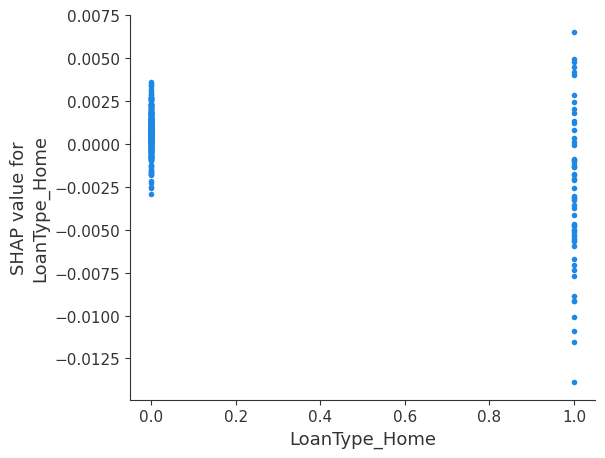

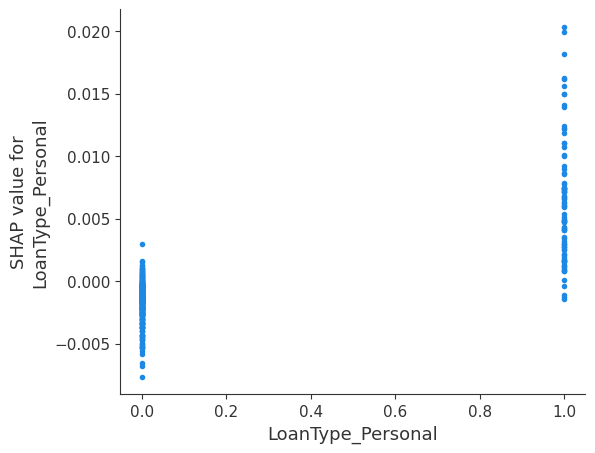

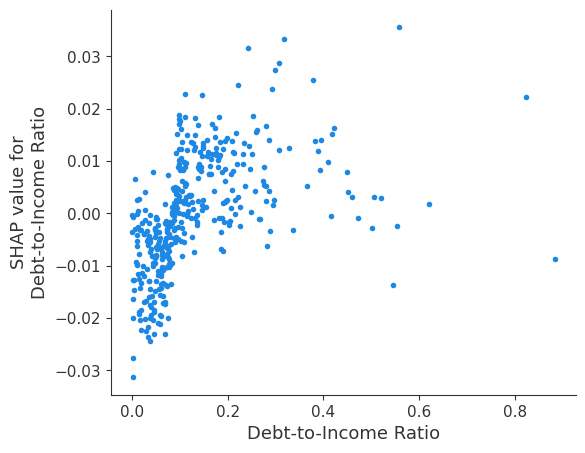

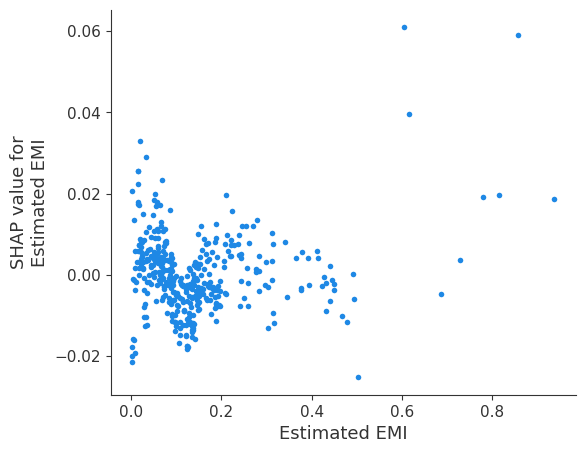

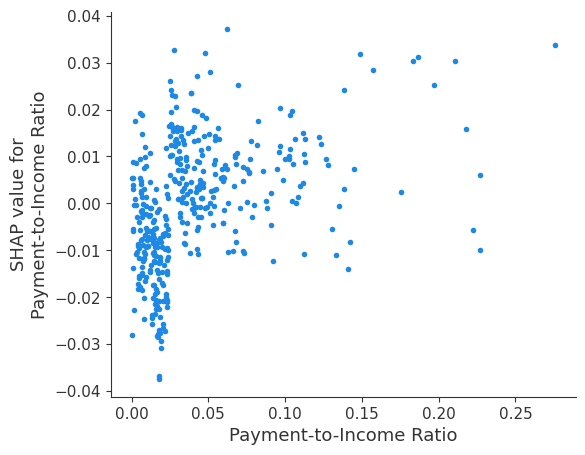

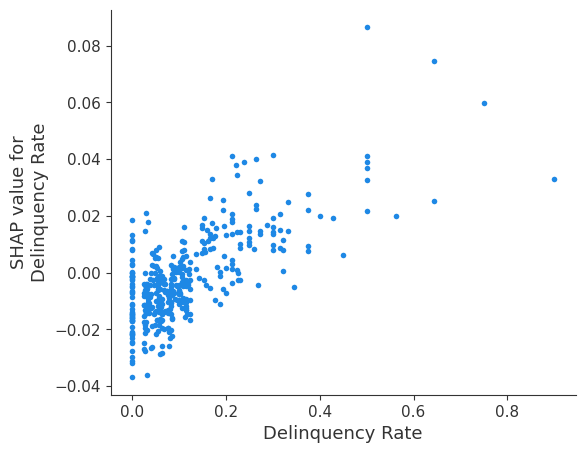

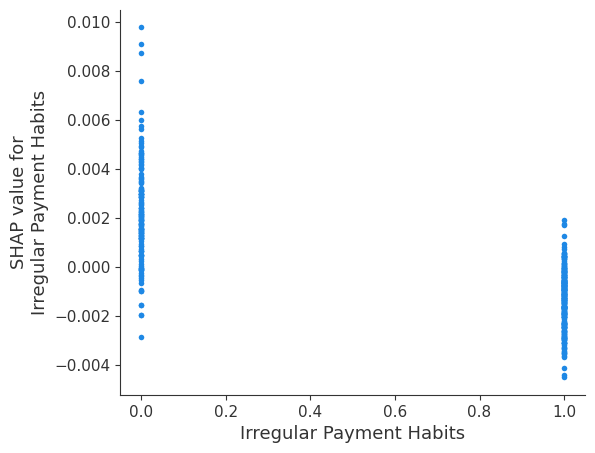

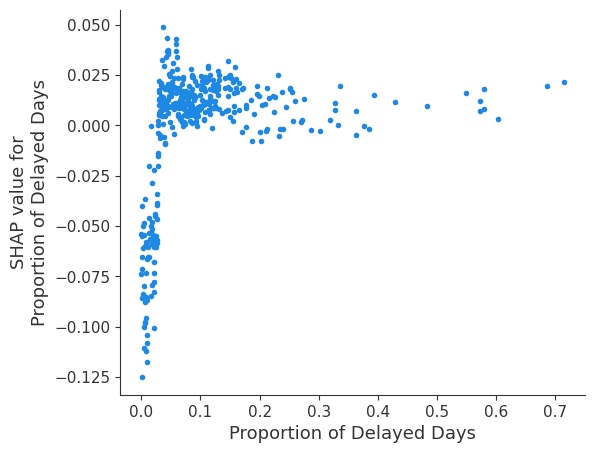

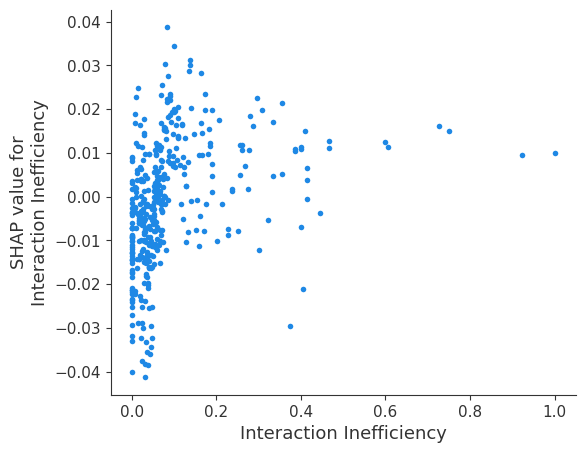

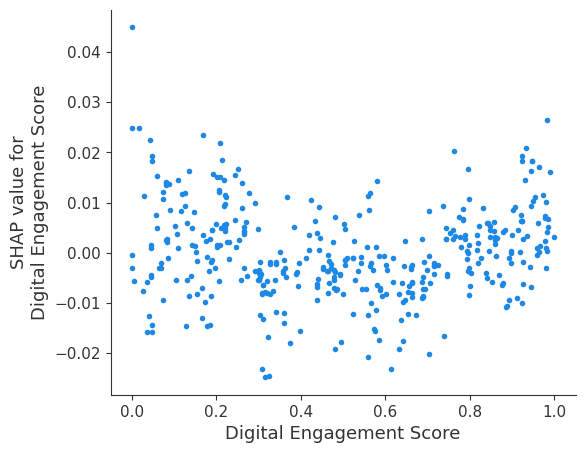

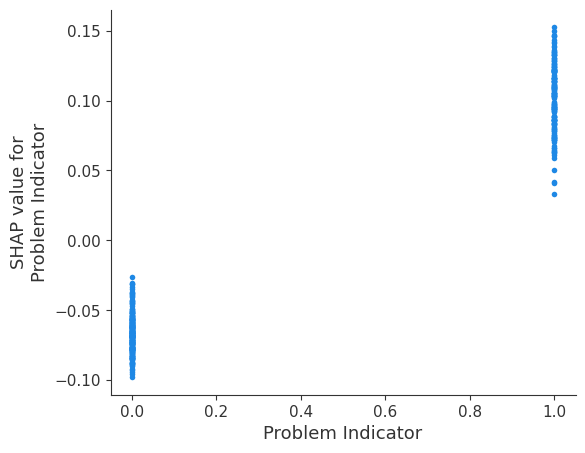

In [ ]:
for i, column in enumerate(X_test.columns):
    shap.dependence_plot(i, shap_values_positive, X_test, interaction_index=None)